In [3]:
import numpy as np
import xarray as xr
import scipy.signal as sg
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
# from matplotlib import patches
# import npc_lims
# from statsmodels.stats.multitest import fdrcorrection
# from npc_sessions import DynamicRoutingSession
# from dynamic_routing_analysis import spike_utils, plot_utils
import os
# from pathlib import Path
# from allensdk.core.reference_space_cache import ReferenceSpaceCache

%load_ext autoreload
%autoreload 2
%matplotlib widget

In [48]:
# load waveforms, run PCA, then append to each metrics tables (PC1,2,3)

waveform_path=r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\metrics for alignment\peak waveforms"
metrics_path=r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\metrics for alignment\stimulus responsiveness"

waveform_files=os.listdir(waveform_path)
metrics_files=os.listdir(metrics_path)

#load waveforms and concat all 
for ww,wf_file in enumerate(waveform_files):
    if 'peak_waveforms' in wf_file:
        if ww==0:
            waveforms=pd.read_pickle(os.path.join(waveform_path,wf_file))
        else:
            waveforms=pd.concat([waveforms,pd.read_pickle(os.path.join(waveform_path,wf_file))],axis=0)
    
#run PCA on waveforms
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

waveforms=waveforms.dropna()
waveforms_array=np.vstack(waveforms['waveform'].values)

# scaler = StandardScaler()
# scaler.fit(waveforms_array)
# waveforms_array=scaler.transform(waveforms_array)

pca = PCA()
pca.fit(waveforms_array)

waveforms_transformed=pca.transform(waveforms_array)

waveform_pcs={
    'unit_id':waveforms['unit_id'].values
}

#add PCs to dataframe
for i in range(3):
    waveform_pcs['PC'+str(i+1)]=waveforms_transformed[:,i]

waveform_pcs=pd.DataFrame(waveform_pcs)
            

In [57]:
waveform_pcs

,unit_id,PC1,PC2,PC3
0,620263_2022-07-27_A-0,441.440746,-47.987146,23.193809
1,620263_2022-07-27_A-1,110.023451,22.164540,0.655844
2,620263_2022-07-27_A-2,262.501763,55.114582,12.219083
3,620263_2022-07-27_A-3,304.859337,84.465203,19.219480
4,620263_2022-07-27_A-4,190.446914,26.148908,-33.812298
...,...,...,...,...
144969,690706_2023-11-29_F-664,145.246826,-1.806169,-56.340344
144970,690706_2023-11-29_F-665,-132.809218,336.657039,21.473202
144971,690706_2023-11-29_F-666,61.387325,38.541602,-30.495831
144972,690706_2023-11-29_F-667,105.690442,4.006238,-68.085879


In [54]:
# test=pd.read_pickle(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\metrics for alignment\peak waveforms\676909_2023-12-14_0_day_4_A_peak_waveforms.pkl")
# test


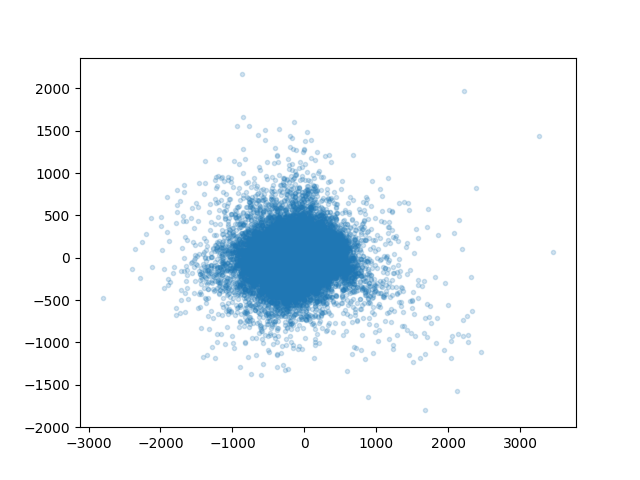

In [62]:
# fig,ax=plt.subplots(1,1)
# ax.plot(waveforms['waveform'].iloc[0])
# ax.plot(waveforms_array[0,:])
fig,ax=plt.subplots(1,1)
ax.plot(waveform_pcs['PC1'],waveform_pcs['PC2'],'.',alpha=0.2)

Text(0, 0.5, 'Explained variance')

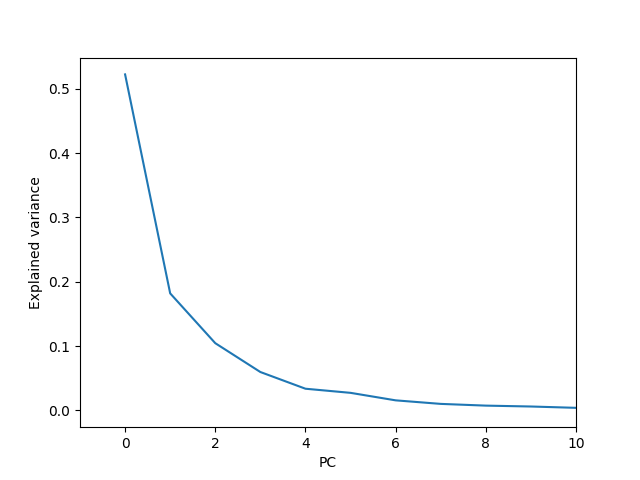

In [53]:
#explained variance
fig,ax=plt.subplots(1,1)
ax.plot(pca.explained_variance_ratio_)
ax.set_xlim([-1,10])
ax.set_xlabel('PC')
ax.set_ylabel('Explained variance')

In [ ]:
# #add PCs to dataframe
# for i in range(5):
#     waveforms['PC'+str(i+1)]=waveforms_transformed[:,i]

Text(0, 0.5, 'PC amplitude')

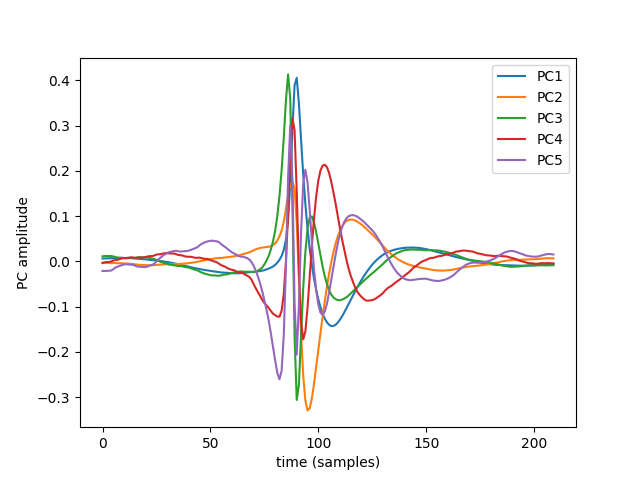

In [58]:
#plot top 3-5 PCs

fig,ax=plt.subplots(1,1)

# for i in range(10):
#     ax.plot(waveforms_transformed[:,i],label=f'PC{i+1}')
for i in range(5):
    ax.plot(pca.components_[i,:],label=f'PC{i+1}')

ax.legend()
ax.set_xlabel('time (samples)')
ax.set_ylabel('PC amplitude')


(-1.0, 5.0)

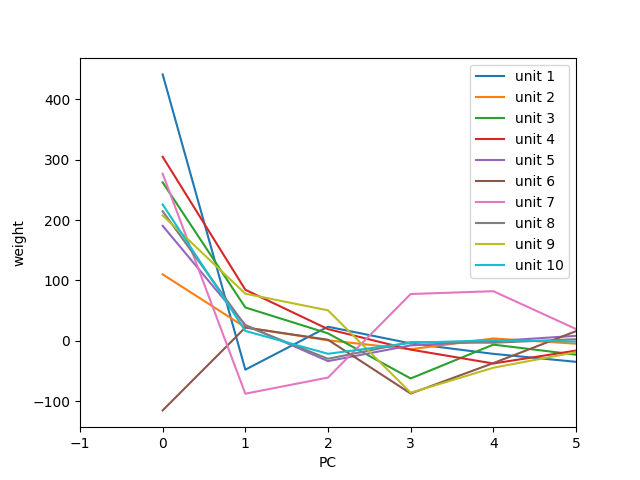

In [59]:
#plot top 3-5 PCs

fig,ax=plt.subplots(1,1)

for i in range(10):
    ax.plot(waveforms_transformed[i,:],label=f'unit {i+1}')
# for i in range(5):
#     ax.plot(pca.components_[i,:],label=f'PC{i+1}')

ax.legend()
ax.set_xlabel('PC')
ax.set_ylabel('weight')
ax.set_xlim([-1,5])

In [ ]:
#load single cell metric data
context_mod_path = r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\single unit metrics\combined\all_stim_context_modulation_new.pkl"
lick_mod_path = r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\single unit metrics\combined\all_lick_modulation.pkl"

In [ ]:
all_data=pd.read_pickle(context_mod_path)
# all_lick_data=pd.read_pickle(lick_mod_path)
# all_data=all_data.merge(all_lick_data, on=['unit_id','project','session_id'], how='left')

In [ ]:
# sel_project='DynamicRouting'
# sel_units=all_data.query('presence_ratio>=0.99 and \
#                             isi_violations_ratio<=0.1 and \
#                             amplitude_cutoff<=0.1 and \
#                             project.str.contains(@sel_project) and \
#                             ~structure.isna() and ~location.isna()')
sel_units=all_data.query('~structure.isna() and ~location.isna()')

# adj_pvals=pd.DataFrame({
#     'unit_id':sel_units['unit_id'].values,
#     'structure':sel_units['structure'].values,
#     'location':sel_units['location'].values,
#     'peak_to_valley':sel_units['peak_to_valley'].values,
#     'vis1':fdrcorrection(sel_units['vis1_stimulus_modulation_p_value'])[1],
#     'vis2':fdrcorrection(sel_units['vis2_stimulus_modulation_p_value'])[1],
#     'sound1':fdrcorrection(sel_units['sound1_stimulus_modulation_p_value'])[1],
#     'sound2':fdrcorrection(sel_units['sound2_stimulus_modulation_p_value'])[1],
#     'catch':fdrcorrection(sel_units['catch_stimulus_modulation_p_value'])[1],
#     'vis1_late':fdrcorrection(sel_units['vis1_stimulus_late_modulation_p_value'])[1],
#     'vis2_late':fdrcorrection(sel_units['vis2_stimulus_late_modulation_p_value'])[1],
#     'sound1_late':fdrcorrection(sel_units['sound1_stimulus_late_modulation_p_value'])[1],
#     'sound2_late':fdrcorrection(sel_units['sound2_stimulus_late_modulation_p_value'])[1],
#     'catch_late':fdrcorrection(sel_units['catch_stimulus_late_modulation_p_value'])[1],
#     'context':fdrcorrection(sel_units['baseline_context_modulation_p_value'])[1],

#     'vis1_latency':sel_units['vis1_stim_latency'],
#     'vis2_latency':sel_units['vis2_stim_latency'],
#     'sound1_latency':sel_units['sound1_stim_latency'],
#     'sound2_latency':sel_units['sound2_stim_latency'],
#     'catch_latency':sel_units['catch_stim_latency'],

#     'vis1_roc_auc':sel_units['vis1_stimulus_modulation_roc_auc'],
#     'vis2_roc_auc':sel_units['vis2_stimulus_modulation_roc_auc'],
#     'sound1_roc_auc':sel_units['sound1_stimulus_modulation_roc_auc'],
#     'sound2_roc_auc':sel_units['sound2_stimulus_modulation_roc_auc'],
#     'context_roc_auc':sel_units['baseline_context_roc_auc'],

#     #### need to re-run metrics
#     # 'lick':fdrcorrection(sel_units['lick_modulation_p_value'])[1],
#     'lick_roc_auc':sel_units['lick_modulation_roc_auc'],

#     'context_sign':sel_units['baseline_context_modulation_sign'],

#     'vis1_context':fdrcorrection(sel_units['vis1_context_modulation_p_value'])[1],
#     'vis2_context':fdrcorrection(sel_units['vis2_context_modulation_p_value'])[1],
#     'sound1_context':fdrcorrection(sel_units['sound1_context_modulation_p_value'])[1],
#     'sound2_context':fdrcorrection(sel_units['sound2_context_modulation_p_value'])[1],
#     'catch_context':fdrcorrection(sel_units['catch_context_modulation_p_value'])[1],

#     'vis1_context_roc_auc':sel_units['vis1_context_modulation_roc_auc'],
#     'vis2_context_roc_auc':sel_units['vis2_context_modulation_roc_auc'],
#     'sound1_context_roc_auc':sel_units['sound1_context_modulation_roc_auc'],
#     'sound2_context_roc_auc':sel_units['sound2_context_modulation_roc_auc'],
#     'catch_context_roc_auc':sel_units['catch_context_modulation_roc_auc'],

#     'vis1_context_sign':sel_units['vis1_context_modulation_sign'],
#     'vis2_context_sign':sel_units['vis2_context_modulation_sign'],
#     'sound1_context_sign':sel_units['sound1_context_modulation_sign'],
#     'sound2_context_sign':sel_units['sound2_context_modulation_sign'],

#     'vis1_context_evoked':fdrcorrection(sel_units['vis1_evoked_context_modulation_p_value'])[1],
#     'vis2_context_evoked':fdrcorrection(sel_units['vis2_evoked_context_modulation_p_value'])[1],
#     'sound1_context_evoked':fdrcorrection(sel_units['sound1_evoked_context_modulation_p_value'])[1],
#     'sound2_context_evoked':fdrcorrection(sel_units['sound2_evoked_context_modulation_p_value'])[1],
#     'catch_context_evoked':fdrcorrection(sel_units['catch_evoked_context_modulation_p_value'])[1],

#     # 'vis_discrim_roc_auc':sel_units['vis_discrim_roc_auc'],
#     # 'aud_discrim_roc_auc':sel_units['aud_discrim_roc_auc'],
#     # 'target_discrim_roc_auc':sel_units['target_discrim_roc_auc'],
#     # 'nontarget_discrim_roc_auc':sel_units['nontarget_discrim_roc_auc'],
#     # 'vis_vs_aud':sel_units['vis_vs_aud'],
#     # 'cr_vs_fa_early_roc_auc':sel_units['cr_vs_fa_early_roc_auc'],
#     # 'hit_vs_cr_early_roc_auc':sel_units['hit_vs_cr_early_roc_auc'],
#     # 'hit_vs_fa_early_roc_auc':sel_units['hit_vs_fa_early_roc_auc'],
#     # 'cr_vs_fa_mid_roc_auc':sel_units['cr_vs_fa_mid_roc_auc'],
#     # 'hit_vs_cr_mid_roc_auc':sel_units['hit_vs_cr_mid_roc_auc'],
#     # 'hit_vs_fa_mid_roc_auc':sel_units['hit_vs_fa_mid_roc_auc'],
#     # 'cr_vs_fa_late_roc_auc':sel_units['cr_vs_fa_late_roc_auc'],
#     # 'hit_vs_cr_late_roc_auc':sel_units['hit_vs_cr_late_roc_auc'],
#     # 'hit_vs_fa_late_roc_auc':sel_units['hit_vs_fa_late_roc_auc'],
# })

# if 'Templeton' in sel_project:
#     adj_pvals['lick']=np.ones(len(adj_pvals))


# adj_pvals['any_stim']=adj_pvals[['vis1','vis2','sound1','sound2']].min(axis=1)

# #stimulus modulation across all units
# #each stim only
# vis1_stim_resp=adj_pvals.query('vis1<0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05')
# vis2_stim_resp=adj_pvals.query('vis2<0.05 and vis1>=0.05 and sound1>=0.05 and sound2>=0.05')
# sound1_stim_resp=adj_pvals.query('sound1<0.05 and sound2>=0.05 and vis1>=0.05 and vis2>=0.05')
# sound2_stim_resp=adj_pvals.query('sound2<0.05 and sound1>=0.05 and vis1>=0.05 and vis2>=0.05')

# #both vis
# both_vis_stim_resp=adj_pvals.query('vis1<0.05 and vis2<0.05 and sound1>=0.05 and sound2>=0.05')
# #both aud
# both_sound_stim_resp=adj_pvals.query('sound1<0.05 and sound2<0.05 and vis1>=0.05 and vis2>=0.05')

# #at least one vis and one aud
# mixed_stim_resp=adj_pvals.query('((vis1<0.05 or vis2<0.05) and (sound1<0.05 and sound2<0.05))')

# #any stim
# # any_stim_resp=adj_pvals.query('vis1<0.05 or vis2<0.05 or sound1<0.05 or sound2<0.05')
# any_stim_resp=adj_pvals.query('any_stim<0.05')
# stim_and_context=adj_pvals.query('any_stim<0.05 and context<0.05')

# #catch
# catch_stim_resp=adj_pvals.query('catch<0.05')

# #none
# no_stim_resp=adj_pvals.query('vis1>=0.05 and vis2>=0.05 and sound1>=0.05 and sound2>=0.05 and catch>=0.05')

In [ ]:
#getting peak channel waveform

peak_channel_idx=np.where(sel_units['peak_channel'].iloc[10]==sel_units['channels'].iloc[10])[0]
fig,ax=plt.subplots()
ax.plot(np.vstack(sel_units['waveform_mean'].iloc[10])[:,peak_channel_idx])

In [ ]:
np.vstack(sel_units['waveform_mean'].iloc[10])[:,peak_channel_idx].shape

In [ ]:
sel_units.columns.values

In [ ]:
#concat all peack channel waveforms


all_peak_waveforms=[]# np.full((len(sel_units),210),np.nan)
all_session_ids=[]
all_unit_ids=[]
all_probes=[]
all_peak_channels=[]
all_unit_structure=[]
all_unit_location=[]
all_ccf_ap=[]
all_ccf_dv=[]
all_ccf_ml=[]
all_peak_to_valley=[]
vis1_resp=[]
sound1_resp=[]

for i in range(len(sel_units)):
    peak_channel_idx=np.where(sel_units['peak_channel'].iloc[i]==sel_units['channels'].iloc[i])[0]
    waveform=np.vstack(sel_units['waveform_mean'].iloc[i])[:,peak_channel_idx].flatten()
    if len(waveform)==210:
        all_peak_waveforms.append(waveform)
        all_session_ids.append(sel_units['session_id'].iloc[i])
        all_unit_ids.append(sel_units['unit_id'].iloc[i])
        all_probes.append(sel_units['electrode_group_name'].iloc[i])
        all_peak_channels.append(sel_units['peak_channel'].iloc[i])
        all_unit_structure.append(sel_units['structure'].iloc[i])
        all_unit_location.append(sel_units['location'].iloc[i])
        all_ccf_ap.append(sel_units['ccf_ap'].iloc[i])
        all_ccf_dv.append(sel_units['ccf_dv'].iloc[i])
        all_ccf_ml.append(sel_units['ccf_ml'].iloc[i])
        all_peak_to_valley.append(sel_units['peak_to_valley'].iloc[i])
        vis1_resp.append(sel_units['vis1_stimulus_modulation_roc_auc'].iloc[i])
        sound1_resp.append(sel_units['sound1_stimulus_modulation_roc_auc'].iloc[i])
    else:
        print(sel_units['unit_id'].iloc[i],' waveform wrong size:',len(waveform))
   
# all_unit_ids=np.array(all_unit_ids)

waveform_df=pd.DataFrame({
    'unit_id':all_unit_ids,
    'session_id':all_session_ids,
    'structure':all_unit_structure,
    'location':all_unit_location,
    'probe':all_probes,
    'peak_channel':all_peak_channels,
    'ccf_ap':all_ccf_ap,
    'ccf_dv':all_ccf_dv,
    'ccf_ml':all_ccf_ml,
    'peak_to_valley':all_peak_to_valley,
    'waveform':all_peak_waveforms,
    'vis1_resp':vis1_resp,
    'sound1_resp':sound1_resp

})
all_peak_waveforms=np.vstack(all_peak_waveforms) 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#PCA on all waveforms
pca = PCA()
pca.fit(all_peak_waveforms)


In [ ]:
#explained variance
fig,ax=plt.subplots(1,1)
ax.plot(pca.explained_variance_ratio_)
ax.set_xlim([-1,10])
ax.set_xlabel('PC')
ax.set_ylabel('Explained variance')

In [ ]:
waveforms_transformed=pca.transform(all_peak_waveforms)

In [ ]:
waveforms_transformed.shape

In [ ]:
pca.components_.shape

In [ ]:
#add PCs to dataframe
for i in range(5):
    waveform_df['PC'+str(i+1)]=waveforms_transformed[:,i]

In [ ]:
#plot top 3-5 PCs

fig,ax=plt.subplots(1,1)

# for i in range(10):
#     ax.plot(waveforms_transformed[:,i],label=f'PC{i+1}')
for i in range(5):
    ax.plot(pca.components_[i,:],label=f'PC{i+1}')

ax.legend()
ax.set_xlabel('time (samples)')
ax.set_ylabel('PC amplitude')


In [ ]:
#plot top 3-5 PCs

fig,ax=plt.subplots(1,1)

for i in range(10):
    ax.plot(waveforms_transformed[i,:],label=f'unit {i+1}')
# for i in range(5):
#     ax.plot(pca.components_[i,:],label=f'PC{i+1}')

ax.legend()
ax.set_xlabel('PC')
ax.set_ylabel('weight')
ax.set_xlim([-1,5])

In [ ]:
fig,ax=plt.subplots(1,1)
ax.plot(waveforms_transformed[:,0],waveforms_transformed[:,1],'.',alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

In [ ]:
fig,ax=plt.subplots()
ax.plot(all_peak_waveforms[0,:])
ax.plot(all_peak_waveforms[5,:])

In [ ]:
# plot VISp vs. CA1 units

area_list=['MOs','ORB','CP']

# VISp_units=waveform_df.query('structure == "VISp"')
# CA1_units=waveform_df.query('structure=="CA1"')

fig,ax=plt.subplots(1,1)

# ax.plot(VISp_units['PC1'],VISp_units['PC2'],'.',alpha=0.3)
# ax.plot(CA1_units['PC1'],CA1_units['PC2'],'.',alpha=0.3)

# ax.plot(VISp_units[['PC1','PC2','PC3','PC4','PC5']].mean(axis=0))
# ax.plot(CA1_units[['PC1','PC2','PC3','PC4','PC5']].mean(axis=0))

for aa in area_list:
    area_units=waveform_df.query('structure.str.contains(@aa)')
    ax.plot(area_units[['PC1','PC2','PC3','PC4','PC5']].mean(axis=0),label=aa)

ax.legend()

In [ ]:
waveform_df['session_id'].unique()

In [ ]:
sel_probe.columns.values

In [ ]:
# probe='probeA'
# probe_channels=channels.query('group_name==@probe')
# probe_channels

# min_area_size=5

# areas=probe_channels['structure'].values

# borders=[]
# for ia,aa in enumerate(areas[1:]):
#     if aa!=areas[ia-1]:
#         borders.append(ia)

# borders=np.asarray(borders)
# borders=np.hstack([borders[np.where(np.diff(borders)>min_area_size)[0]],borders[-1]])
# border_midpoints=(borders[1:]+borders[:-1])/2
# border_labels=areas[np.round(border_midpoints).astype('int')]

In [ ]:
# border_labels

In [ ]:
#plot channel metrics

def plot_channel_metrics(session,sel_session,min_area_size,save_path):
    
    channels=pd.read_parquet(
        npc_lims.get_cache_path('electrodes',session,version='any')
    )

    #loop through probes
    probes=np.sort(sel_session['probe'].unique())
    resp_fig,resp_ax=plt.subplots(1,len(probes),figsize=(12,6))
    pc_fig,pc_ax=plt.subplots(1,len(probes),figsize=(12,6))

    for pr,probe in enumerate(probes):

        probe_channels=channels.query('group_name==@probe')
        
        areas=probe_channels['location'].values

        borders=[]
        for ia,aa in enumerate(areas[1:]):
            if aa!=areas[ia-1]:
                borders.append(ia)

        borders=np.asarray(borders)
        borders=np.hstack([borders[np.where(np.diff(borders)>min_area_size)[0]],borders[-1]])
        border_midpoints=(borders[1:]+borders[:-1])/2
        border_labels=areas[np.round(border_midpoints).astype('int')]


        sel_probe=sel_session.query('probe==@probe')
        sel_probe=sel_probe.sort_values(by='peak_channel')

        ch_bins=np.arange(0,384+4,4)
        unit_density,edges=np.histogram(sel_probe['peak_channel'],bins=ch_bins)
        resp_ax[pr].plot(-unit_density/np.max(unit_density),ch_bins[:-1],'k',label='unit density')
        pc_ax[pr].plot(-unit_density/np.max(unit_density),ch_bins[:-1],'k',label='unit density')

        pc1_output=st.binned_statistic(sel_probe['peak_channel'], sel_probe['PC1'], bins=ch_bins, statistic='mean',)
        pc2_output=st.binned_statistic(sel_probe['peak_channel'], sel_probe['PC2'], bins=ch_bins, statistic='mean',)
        pc3_output=st.binned_statistic(sel_probe['peak_channel'], sel_probe['PC3'], bins=ch_bins, statistic='mean',)
        pc_ax[pr].plot(np.abs(pc1_output.statistic/np.nanmax(np.abs(pc1_output.statistic))),ch_bins[:-1],label='PC1',color='tab:green')
        pc_ax[pr].plot(np.abs(pc2_output.statistic/np.nanmax(np.abs(pc2_output.statistic))),ch_bins[:-1],label='PC2',color='tab:red')
        # pc_ax[pr].plot(np.abs(pc3_output.statistic/np.nanmax(np.abs(pc3_output.statistic))),ch_bins[:-1],label='PC3')

        vis_resp=st.binned_statistic(sel_probe['peak_channel'], sel_probe['vis1_resp'], bins=ch_bins, statistic='mean',)
        sound_resp=st.binned_statistic(sel_probe['peak_channel'], sel_probe['sound1_resp'], bins=ch_bins, statistic='mean',)
        resp_ax[pr].plot(np.abs(vis_resp.statistic-0.5)*2,ch_bins[:-1],label='vis1 resp')
        resp_ax[pr].plot(np.abs(sound_resp.statistic-0.5)*2,ch_bins[:-1],label='sound1 resp')

        
        for bb in borders:
            pc_ax[pr].axhline(bb,color='k',linewidth=0.5)
            resp_ax[pr].axhline(bb,color='k',linewidth=0.5)

        pc_ax[pr].set_yticks(border_midpoints)
        pc_ax[pr].set_yticklabels(border_labels,rotation=0,va='center',ha='right')
        pc_ax[pr].set_title(probe)

        resp_ax[pr].set_yticks(border_midpoints)
        resp_ax[pr].set_yticklabels(border_labels,rotation=0,va='center',ha='right')
        resp_ax[pr].set_title(probe)

    resp_ax[-1].legend()
    pc_ax[-1].legend()

    pc_fig.suptitle(session)
    pc_fig.tight_layout()

    resp_fig.suptitle(session)
    resp_fig.tight_layout()

    resp_fig.savefig(os.path.join(save_path,session+'_stim_resp.png'),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
    pc_fig.savefig(os.path.join(save_path,session+'_PCs.png'),
                dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)

    plt.close(resp_fig)
    plt.close(pc_fig)

In [ ]:
sel_probe['peak_channel'].values

In [ ]:
#plot PCs along a probe, with putative areas

min_area_size=4 #for visualization

for session in waveforms['session_id'].unique():
    sel_session=waveforms.query('session_id==@session')
    save_path=r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\metrics for alignment\plots"
    plot_channel_metrics(session,sel_session,min_area_size,save_path)

# session=waveform_df['session_id'].unique()[20]
# sel_session=waveform_df.query('session_id==@session')

In [ ]:
sel_probe['structure']

In [ ]:
pc1_output.statistic/np.nanmax(np.abs(pc1_output.statistic))

In [ ]:
sel_probe

In [ ]:
# single_waveform_transformed=pca.transform(all_peak_waveforms[0,:].reshape(-1,1))
probes

In [ ]:

#plot amount of top 3 PCs for each structure
#VISp, CA1
#MOs, CP
#MOs, ORB